# Dogs & Cats Image Classification

## Module Imports

In [1]:
# Numpy
import numpy as np

# MatPlotLib
import matplotlib.pyplot as plt

# Operating System
import os
import time

# CV2
import cv2

# Random
import random

# Pickle
import pickle

# TensorFlow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard

## Importing Data

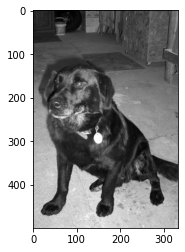

In [2]:
# Dataset location
DATADIR = "/Users/Jordan/Documents/Projects/DogsCats_NN_ImageClassification/PetImages"
# Categories (folder names)
CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES: # for each folder
    path = os.path.join(DATADIR, category) # create path to dogs & cats folders
    for img in os.listdir(path): # for each image in each folder
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE) # create pixel array using greyscale values only
        
        # Show greyscale image
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break # only display first image
    break # only go to first category

In [3]:
# Printing image shape
print(img_array.shape)

(500, 333)


## Resizing Images

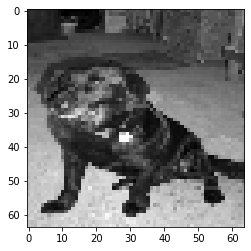

In [4]:
# Image Scale
IMG_SIZE = 64

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) # resize image using image scale
plt.imshow(new_array, cmap='gray') # show image
plt.show()

## Creating Training Dataset

In [5]:
training_data = []

def create_training_data():
    for category in CATEGORIES: # for each folder
        path = os.path.join(DATADIR, category) # create path to dogs & cats folders
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path): # for each image in each folder
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE) # create pixel array using greyscale values only
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) # resize image using image scale
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_training_data()

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2230 extraneous bytes before marker 0xd9
Corrupt JPEG data: 254 extraneous bytes before marker 0xd9
Corrupt JPEG data: 399 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


In [6]:
# Print size of training dataset
print("Training examples:", len(training_data))

Training examples: 24946


### Shuffling Data

In [7]:
# Shuffling data
random.shuffle(training_data)

In [8]:
# Printing class labels of first 10 examples
for sample in training_data[:10]:
    print(sample[1])

1
1
1
0
0
0
0
0
1
0


## Separating Features & Labels

In [9]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # all images, image dimensions, image colour channels

## Saving Dataset

In [10]:
# Saving feature set to file
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

# Saving label set to file
pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

## Opening Dataset

In [19]:
# Loading feature set from file
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

# Loading label set from file
pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)

In [20]:
X[0]

array([[[  7],
        [  9],
        [  8],
        ...,
        [132],
        [175],
        [177]],

       [[  6],
        [  8],
        [  8],
        ...,
        [153],
        [166],
        [156]],

       [[  8],
        [  8],
        [  8],
        ...,
        [157],
        [129],
        [119]],

       ...,

       [[ 73],
        [ 62],
        [ 73],
        ...,
        [178],
        [173],
        [162]],

       [[ 70],
        [ 60],
        [ 72],
        ...,
        [169],
        [160],
        [162]],

       [[ 69],
        [ 63],
        [ 70],
        ...,
        [163],
        [155],
        [151]]], dtype=uint8)

In [21]:
y[0]

1

## Normalising Dataset

In [22]:
# Scaling data
X = X/255.0

In [23]:
# Converting to numpy
y = np.array(y)

## Building Model

In [24]:
# Instantiating model
model = Sequential()

# Adding layers to NN
# Layer 1
model.add(Conv2D(64, (3, 3), input_shape=X.shape[1:])) # convolution layer
model.add(Activation("relu")) # activation layer
model.add(MaxPooling2D(pool_size=(2,2))) # pooling layer

# Layer 2
model.add(Conv2D(64, (3,3))) # convolution layer
model.add(Activation("relu")) # activation layer
model.add(MaxPooling2D(pool_size=(2,2))) # pooling layer

# Layer 3
model.add(Flatten()) # flatten 3D feature maps to 1D feature vectors
model.add(Dense(64)) # dense layer
model.add(Activation("relu")) # activation layer

# Output layer
model.add(Dense(1)) # dense layer
model.add(Activation("sigmoid"))

# Compiling model
model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

## Training Model

In [8]:
# Training model
model.fit(X, y, batch_size=32, epochs=3, validation_split=0.1)

Epoch 1/3
702/702 [==============================] - 54s 76ms/step - loss: 0.6073 - accuracy: 0.6619 - val_loss: 0.5478 - val_accuracy: 0.7259
Epoch 2/3
702/702 [==============================] - 54s 77ms/step - loss: 0.5011 - accuracy: 0.7564 - val_loss: 0.5064 - val_accuracy: 0.7459
Epoch 3/3
702/702 [==============================] - 50s 71ms/step - loss: 0.4694 - accuracy: 0.7786 - val_loss: 0.4931 - val_accuracy: 0.7599


# Using TensorBoard

In [25]:
# Specifying model name
NAME = "Cats-vs-dogs-CNN-64x2-{}".format(int(time.time()))

# Instantiating TensorBoard
tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))

In [26]:
# Training model
model.fit(X, y, batch_size=32, epochs=5, validation_split=0.3, callbacks=[tensorboard])

Epoch 1/5
546/546 [==============================] - 52s 95ms/step - loss: 0.6762 - accuracy: 0.5683 - val_loss: 0.6367 - val_accuracy: 0.6362
Epoch 2/5
546/546 [==============================] - 51s 93ms/step - loss: 0.5939 - accuracy: 0.6865 - val_loss: 0.5458 - val_accuracy: 0.7298
Epoch 3/5
546/546 [==============================] - 53s 97ms/step - loss: 0.4961 - accuracy: 0.7609 - val_loss: 0.5094 - val_accuracy: 0.7511
Epoch 4/5
546/546 [==============================] - 50s 91ms/step - loss: 0.4381 - accuracy: 0.7956 - val_loss: 0.4855 - val_accuracy: 0.7630
Epoch 5/5
546/546 [==============================] - 56s 102ms/step - loss: 0.3881 - accuracy: 0.8248 - val_loss: 0.4782 - val_accuracy: 0.7696
